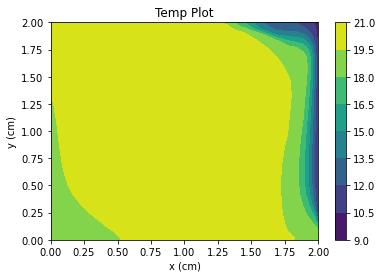

In [3]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
from scipy.linalg import norm
import math 
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp2d

f1=open("xc.dat",'r')
f2=open("yc.dat")
f3=open("u.dat")
f4=open("v.dat")



xc=f1.readlines()
xc = list(map(float, xc))
xc=np.array(xc)
nim1=len(xc)
ni=nim1+1 #Number of cell center with 2 boundery 

yc=f2.readlines()
yc = list(map(float, yc))
yc=np.array(yc)
njm1=len(yc) #26
nj=njm1+1 #27

u1=f3.readlines()
u1 = list(map(float, u1))
u2d=np.reshape(u1,(ni,nj)) #27*27
u2d=np.array(u2d)
u2d=u2d.transpose()

v1=f4.readlines()
v1 = list(map(float, v1))
v2d=np.reshape(v1,(ni,nj)) #27*27
v2d=np.array(v2d)
v2d=v2d.transpose()
#print(v2d.shape)


#  xc and yc are the coordinates of the grid

#        o---------------o  yc(j)
#        |               |
#        |               |
#        |       P       |
#        |               |
#        |               |
#        o---------------o  yc(j-1)

#      xc(i-1)          xc(i)          

# The cell-node (P) has the coordinates xp(i), yp(j)

# compute the x-coordinates of the cell centres
xp= np.ones(ni)
for i in range(1,nim1):
    xp[i]=0.5*(xc[i]+xc[i-1])
xp[0]=xc[0]
xp[-1]=xc[-1]
xp=np.array([xp])
xp=xp.transpose()

yp= np.ones(nj)
for i in range(1,njm1):
    yp[i]=0.5*(yc[i]+yc[i-1])
yp[0]=yc[0]
yp[-1]=yc[-1]
yp=np.array([yp])
yp=yp.transpose()

#u[i,j] = u2d[i,j+1]+(u2d[i+1,j+1]-u2d[i,j+1])*(xc[i]-xp[i])/(xp[i+1]-xp[i]);
u=np.zeros((26,26),dtype=np.float32)
v=np.zeros((26,26),dtype=np.float32)
for i in range(1,nim1-1):
    for j in range(0,njm1-1):
        u[i][j]=0.5*(u2d[i][j]+u2d[i][j+1])
for j in range(0,njm1-1):
    u[0][j]=u2d[0,j+1]
    u[nim1-1,j]=u2d[nim1,j+1]
for i in range(0,nim1-1):
    for j in range(1,njm1-1):
        v[i][j]=0.5*(v2d[i][j]+v2d[i][j+1])
for i in range(0,nim1-1):
    v[i,0]=v2d[i+1,0]
    v[i,njm1-1]=v2d[i+1,njm1]
        
        
#plot for the Velocity.................
# plt.quiver(xc,yc,u,v,9)
# plt.savefig("output2.png",dpi=600)
# plt.show()

Nx = ni-2 #number of cell 
Ny = nj-2 #number of cell 
gamma=1/500 #k_by_cp
rho=1
Key=0
epc=10**(-3)
T_0=np.ones((ni,nj),dtype=np.float32)*10
T=np.ones((ni,nj),dtype=np.float32)*10
#-----define BC for Dirichlet 
for j in range(6,Ny+2):
    T[-1][j] = 10
for j in range(Ny-4,Ny+1):
    T[0,j] = 20    
residu=[]
itaration=[]
count=0    
v=v.transpose()
u=u.transpose()
while(Key==0):    
    for i in range(1,ni-1):
        for j in range(1,nj-1):
            Fw=rho*u[i-1][j-1]*(yc[j]-yc[j-1]);  Dw=(gamma*(yc[j]-yc[j-1]))/(xp[i]-xp[i-1])
            Fe=rho*u[i][j-1]*(yc[j]-yc[j-1]);    De=(gamma*(yc[j]-yc[j-1]))/(xp[i+1]-xp[i])
            Fs=rho*v[i-1][j-1]*(xc[i]-xc[i-1]);  Ds=(gamma*(xc[i]-xc[i-1]))/(yp[i]-yp[i-1])
            Fn=rho*v[i-1][j]*(xc[i]-xc[i-1]);    Dn=(gamma*(xc[i]-xc[i-1]))/(yp[i+1]-yp[i])
            Aw=max(Fw,(Dw+Fw/2),0); As=max(Fs,(Ds+Fs/2),0)
            Ae=max(-Fe,(De-Fe/2),0);An=max(-Fn,(Dn-Fn/2),0)
            Ap=Aw+Ae+An+As
            T[i][j]=(Ae*T[i+1][j]+Aw*T[i-1][j]+An*T[i][j+1]+As*T[i][j-1])/Ap
    #Boundaries Update for Newmann
    for j in range(0,nj-6):
        T[0,j]=T[1,j]
    for j in range(0,6):
        T[-1,j]=T[-2,j]
    for i in range(0,ni):
        T[i,0] = T[i,1];
        T[i,-1] = T[i,-2];
        
            
    count=count+1
    itaration.append(count)            #itaration[j]=count
    #R[j]=(norm(T-T_0))/len(T)
    R=(norm(T-T_0))/len(T)
    residu.append(R)
    if(R<epc):
        Key=1
    T_0=copy.copy(T)
T_tran=T.transpose()    
[X,Y]=np.meshgrid(xp,yp) #to view temp plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T_tran)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Temp Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.savefig("output2.png",dpi=600)
plt.show() 


In [29]:
count

705

In [1]:
1 + 2 * 3 - 8 / 4

5.0

In [4]:
T_tran

array([[18.807922 , 18.807922 , 18.82475  , 18.851856 , 18.891897 ,
        18.947897 , 19.02317  , 19.121063 , 19.243177 , 19.382942 ,
        19.515062 , 19.602774 , 19.637266 , 19.644642 , 19.644073 ,
        19.641146 , 19.635817 , 19.624998 , 19.599709 , 19.54116  ,
        19.482693 , 19.426445 , 19.370874 , 19.316648 , 19.265211 ,
        19.21779  , 19.21779  ],
       [18.807922 , 18.807922 , 18.82475  , 18.851856 , 18.891897 ,
        18.947897 , 19.02317  , 19.121063 , 19.243177 , 19.382942 ,
        19.515062 , 19.602774 , 19.637266 , 19.644642 , 19.644073 ,
        19.641146 , 19.635817 , 19.624998 , 19.599709 , 19.54116  ,
        19.482693 , 19.426445 , 19.370874 , 19.316648 , 19.265211 ,
        19.21779  , 19.21779  ],
       [18.814812 , 18.814812 , 18.832169 , 18.85947  , 18.89944  ,
        18.955076 , 19.029701 , 19.1269   , 19.248955 , 19.389927 ,
        19.523186 , 19.609142 , 19.640078 , 19.645567 , 19.64452  ,
        19.641624 , 19.636683 , 19.627172 , 19.605